# Drop Out Layer 변화 확인

In [77]:
import torch
m = torch.nn.Dropout(p=0.5)
input = torch.randn(4, 4)
output = m(input)

print(input)
print(output)

tensor([[-0.6835, -0.1091,  1.4759,  0.6719],
        [ 0.4422, -2.1178, -0.1620, -0.4438],
        [ 0.7360, -0.7941,  0.2963, -2.6003],
        [ 0.8321, -0.4986, -2.2247, -0.5037]])
tensor([[-1.3671, -0.0000,  2.9518,  0.0000],
        [ 0.0000, -4.2356, -0.3241, -0.8875],
        [ 0.0000, -0.0000,  0.0000, -0.0000],
        [ 0.0000, -0.9972, -4.4494, -1.0075]])


# Batch Normalization 확인하기

In [78]:
m = torch.nn.BatchNorm1d(5)
input = torch.randn(5, 5)
output = m(input)

print(input)
print(output)
print(output.mean(axis=0),output.var(axis=0))

tensor([[ 1.0457,  0.4737, -2.1926, -0.8499, -0.7495],
        [-1.5601,  0.2211, -1.2239,  0.0444, -0.9732],
        [-1.2925,  0.7102, -1.5141,  0.7882,  1.5498],
        [ 0.4541,  0.1726, -0.8243, -0.0448, -0.3083],
        [-0.4604, -1.6472,  0.4657, -0.7039,  0.9234]])
tensor([[ 1.4142,  0.5812, -1.2850, -1.1859, -0.8535],
        [-1.2024,  0.2801, -0.1881,  0.3364, -1.0813],
        [-0.9338,  0.8631, -0.5166,  1.6024,  1.4885],
        [ 0.8201,  0.2223,  0.2645,  0.1844, -0.4041],
        [-0.0982, -1.9466,  1.7252, -0.9374,  0.8505]],
       grad_fn=<NativeBatchNormBackward0>)
tensor([-1.3411e-08,  0.0000e+00, -9.5367e-08,  2.3842e-08, -1.1921e-08],
       grad_fn=<MeanBackward1>) tensor([1.2500, 1.2500, 1.2500, 1.2500, 1.2500], grad_fn=<VarBackward0>)


# Weight Decay

In [79]:
# 재료 준비
import torch

In [80]:
# device 설정 (gpu & cpu)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# random seed 고정 (항상 같은 결과값이 나오게 하기 위함)
torch. manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [81]:
x_train = torch.FloatTensor([[1, -0.3, 0.8],
                             [0.7, 0.2, 0.6],
                             [0.3, 0.5, 0.3],
                             [1, 1, 1.1],
                             [-1, -1.5, -1.2]]).to(device)
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]]).to(device)

In [82]:
# 실제로 모델을 만드는 부분
model = torch.nn.Linear(3, 1).to(device) 

In [83]:
# loss function과 optimizer 선언
criterion = torch.nn.MSELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1,weight_decay=1)

In [84]:
for epoch in range(20):
    hypothesis = model(x_train) # 예측값 뽑아내기
    cost = criterion(hypothesis, y_train) # loss 계산
    optimizer.zero_grad() # optimizer에 저장된 gradient값을 0으로 초기화 
    cost.backward() # loss를 back propagation 연산
    optimizer.step() # back propatation의 결과를 바탕으로 optimizer를 이용해 weight 업데이트

    
    print(epoch, cost.item())

0 29797.48828125
1 16323.1328125
2 10607.453125
3 7742.90771484375
4 6134.82666015625
5 5164.53955078125
6 4550.20751953125
7 4147.435546875
8 3876.17822265625
9 3689.55126953125
10 3558.909912109375
11 3466.13720703125
12 3399.44140625
13 3350.96484375
14 3315.369140625
15 3288.969970703125
16 3269.19580078125
17 3254.23291015625
18 3242.79296875
19 3233.952880859375


# Drop Out

In [85]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
# 데이터를 훈련용과 테스트용으로 분리
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from torchsummary import summary
import matplotlib.pyplot as plt

# 전체의 20%는 검증용
digits = load_digits()
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train = torch.tensor(Y_train, dtype=torch.int64).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_test = torch.tensor(Y_test, dtype=torch.int64).to(device)

In [86]:
linear1 = torch.nn.Linear(64, 100, bias=True)
linear2 = torch.nn.Linear(100, 100, bias=True)
linear3 = torch.nn.Linear(100, 100, bias=True)
linear4 = torch.nn.Linear(100, 100, bias=True)
linear5 = torch.nn.Linear(100, 10, bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(0.5)
batch = torch.nn.BatchNorm1d(100)

In [87]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3,relu,
                           linear4,relu,linear5).to(device)

100%|██████████| 100/100 [00:12<00:00,  8.20it/s]


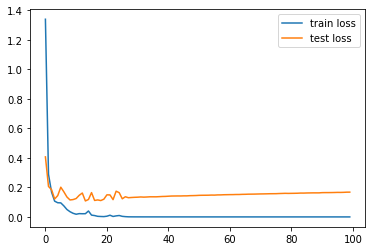

In [88]:
lossFunc = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters())

ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

trainLosses = []
testLosses = []

for epoch in tqdm(range(100)):
    runningLoss = 0.0
    # 신경망을 train 모드로 설정
    model.train()
    for i, (batchX, batchY) in enumerate(loader):
        optimizer.zero_grad()
        
        yPred = model(batchX)
        loss = lossFunc(yPred, batchY)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()
    trainLosses.append(runningLoss/i)
    
    # 신경망을 test 모드로 설정
    model.eval()
    yPred = model(X_test)
    testLoss = lossFunc(yPred, Y_test)
    testLosses.append(testLoss.item())

plt.plot(range(100), trainLosses, label = "train loss")
plt.plot(range(100), testLosses, label = "test loss")
plt.legend()

In [89]:
model = torch.nn.Sequential(linear1, relu, dropout,linear2, relu,dropout, linear3, relu,dropout,
                           linear4,relu,dropout,linear5).to(device)

In [90]:
summary(model.to(device), (64,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]           6,500
              ReLU-2                  [-1, 100]               0
           Dropout-3                  [-1, 100]               0
            Linear-4                  [-1, 100]          10,100
              ReLU-5                  [-1, 100]               0
           Dropout-6                  [-1, 100]               0
            Linear-7                  [-1, 100]          10,100
              ReLU-8                  [-1, 100]               0
           Dropout-9                  [-1, 100]               0
           Linear-10                  [-1, 100]          10,100
             ReLU-11                  [-1, 100]               0
          Dropout-12                  [-1, 100]               0
           Linear-13                   [-1, 10]           1,010
Total params: 37,810
Trainable params: 

100%|██████████| 100/100 [00:12<00:00,  7.94it/s]


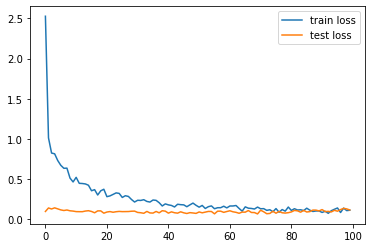

In [91]:
lossFunc = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters())

ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

trainLosses = []
testLosses = []

for epoch in tqdm(range(100)):
    runningLoss = 0.0
    # 신경망을 train 모드로 설정
    model.train()
    for i, (batchX, batchY) in enumerate(loader):
        optimizer.zero_grad()
        
        yPred = model(batchX)
        loss = lossFunc(yPred, batchY)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()
    trainLosses.append(runningLoss/i)
    
    # 신경망을 test 모드로 설정
    model.eval()
    yPred = model(X_test)
    testLoss = lossFunc(yPred, Y_test)
    testLosses.append(testLoss.item())

plt.plot(range(100), trainLosses, label = "train loss")
plt.plot(range(100), testLosses, label = "test loss")
plt.legend()

# Batch Normalization

In [92]:
model = torch.nn.Sequential(linear1, relu, batch,dropout,linear2, relu ,batch,dropout, linear3, relu,batch,dropout,linear4,relu, batch, dropout,linear5).to(device)


In [93]:
summary(model.to(device), (64,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]           6,500
              ReLU-2                  [-1, 100]               0
       BatchNorm1d-3                  [-1, 100]             200
           Dropout-4                  [-1, 100]               0
            Linear-5                  [-1, 100]          10,100
              ReLU-6                  [-1, 100]               0
       BatchNorm1d-7                  [-1, 100]             200
           Dropout-8                  [-1, 100]               0
            Linear-9                  [-1, 100]          10,100
             ReLU-10                  [-1, 100]               0
      BatchNorm1d-11                  [-1, 100]             200
          Dropout-12                  [-1, 100]               0
           Linear-13                  [-1, 100]          10,100
             ReLU-14                  [

100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


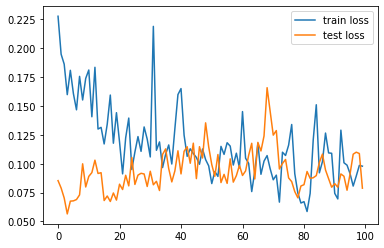

In [94]:
lossFunc = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters())

ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

trainLosses = []
testLosses = []

for epoch in tqdm(range(100)):
    runningLoss = 0.0
    # 신경망을 train 모드로 설정
    model.train()
    for i, (batchX, batchY) in enumerate(loader):
        optimizer.zero_grad()
        
        yPred = model(batchX)
        loss = lossFunc(yPred, batchY)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()
    trainLosses.append(runningLoss/i)
    
    # 신경망을 test 모드로 설정
    model.eval()
    yPred = model(X_test)
    testLoss = lossFunc(yPred, Y_test)
    testLosses.append(testLoss.item())

plt.plot(range(100), trainLosses, label = "train loss")
plt.plot(range(100), testLosses, label = "test loss")
plt.legend()

In [95]:
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0251, -0.1329,  0.0361, -0.0234, -0.1764, -0.1884, -0.0849,  0.2194,
         -0.1729,  0.1902,  0.0584,  0.2022,  0.1370, -0.2031,  0.1576, -0.1830,
          0.0120, -0.2309,  0.0494,  0.0824, -0.0215,  0.2116, -0.0700, -0.0324,
         -0.1907,  0.0079,  0.2144, -0.0121,  0.1437,  0.2208,  0.1996,  0.0770,
          0.1545,  0.1058, -0.0963,  0.0782, -0.2172, -0.0418,  0.0064, -0.0669,
          0.0051, -0.2131, -0.1584, -0.1827,  0.1576, -0.1976, -0.2192,  0.0569,
         -0.0717,  0.0093,  0.2202,  0.0359, -0.0555, -0.1240,  0.1910,  0.0918,
          0.1009,  0.0921, -0.1599,  0.1096, -0.0066, -0.1486,  0.1038, -0.0050,
          0.1115, -0.2247,  0.1780, -0.0068,  0.0995, -0.1348,  0.2185, -0.1591,
          0.1169,  0.0059,  0.0727,  0.1557,  0.1723, -0.0099, -0.2035, -0.2120,
          0.0447, -0.2243, -0.1937,  0.2081,  0.2136, -0.1133, -0.1297, -0.0808,
          0.0708,  0.1829, -0.0670,  0.1922,  0.0312,  0.0100,  0.1435, -0.1953,
      

In [96]:
model = torch.nn.Sequential(linear1, relu, batch,dropout,linear2, relu ,batch,dropout, linear3, relu,batch,dropout,linear4,relu, batch, dropout,linear5).to(device)


100%|██████████| 100/100 [00:15<00:00,  6.31it/s]


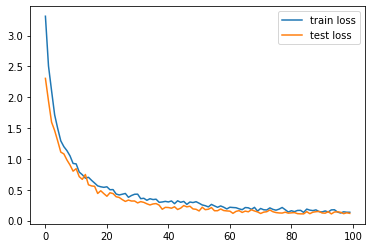

In [97]:
lossFunc = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters())

ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

trainLosses = []
testLosses = []

for epoch in tqdm(range(100)):
    runningLoss = 0.0
    # 신경망을 train 모드로 설정
    model.train()
    for i, (batchX, batchY) in enumerate(loader):
        optimizer.zero_grad()
        
        yPred = model(batchX)
        loss = lossFunc(yPred, batchY)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()
    trainLosses.append(runningLoss/i)
    
    # 신경망을 test 모드로 설정
    model.eval()
    yPred = model(X_test)
    testLoss = lossFunc(yPred, Y_test)
    testLosses.append(testLoss.item())

plt.plot(range(100), trainLosses, label = "train loss")
plt.plot(range(100), testLosses, label = "test loss")
plt.legend()